# Task-3 IRIS FLOWER CLASSIFICATION

In [1]:
#import requirement
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
sns.set()

## Load data 
let's load the IRIS flower data

In [3]:
data = pd.read_csv('IRIS.csv')

In [4]:
data.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data["species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

This is multiclass classification problem.

Lets do some EDA

In [8]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
data['species_numeric'] = pd.factorize(data['species'])[0] + 0

In [10]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_numeric
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [11]:
# Basic descriptive statistics
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_numeric
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Distribution of features and target

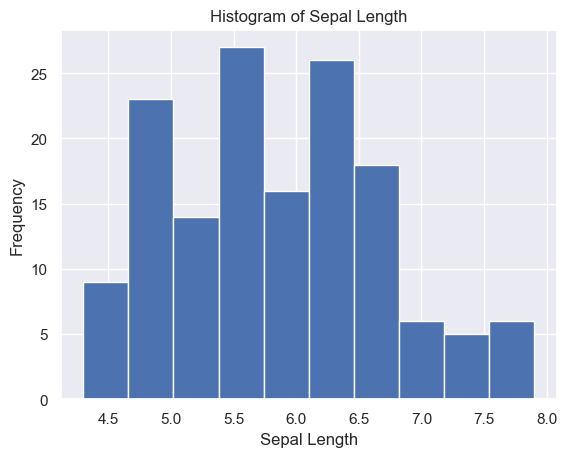

In [14]:
data["sepal_length"].hist()
plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()

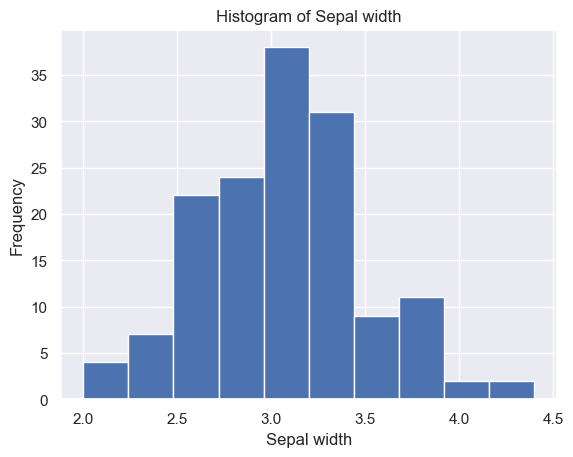

In [15]:
data["sepal_width"].hist()
plt.title("Histogram of Sepal width")
plt.xlabel("Sepal width")
plt.ylabel("Frequency")
plt.show()

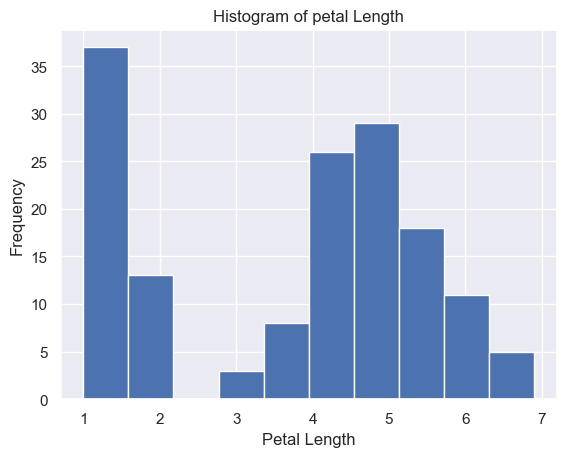

In [16]:
data["petal_length"].hist()
plt.title("Histogram of petal Length")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.show()

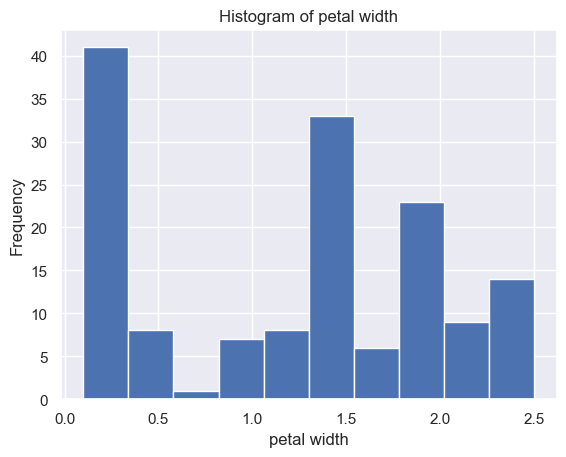

In [17]:
data["petal_width"].hist()
plt.title("Histogram of petal width")
plt.xlabel("petal width")
plt.ylabel("Frequency")
plt.show()

## Relationship of data feature with the species

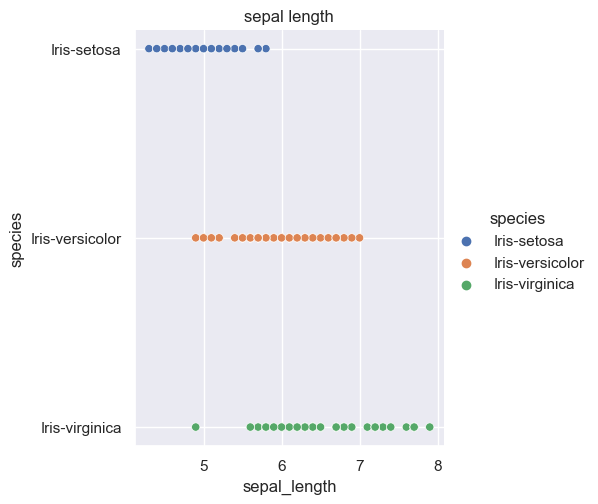

In [18]:
sns.relplot(x='sepal_length', y='species', hue='species', data=data)
plt.title('sepal length')
plt.show()

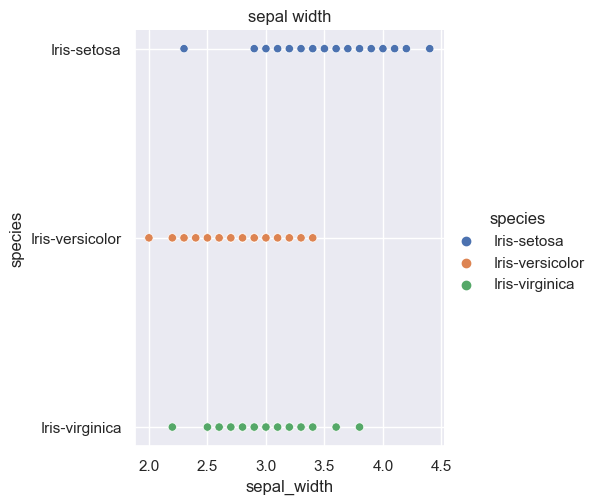

In [19]:
sns.relplot(x='sepal_width', y='species', hue='species', data=data)
plt.title('sepal width')
plt.show()

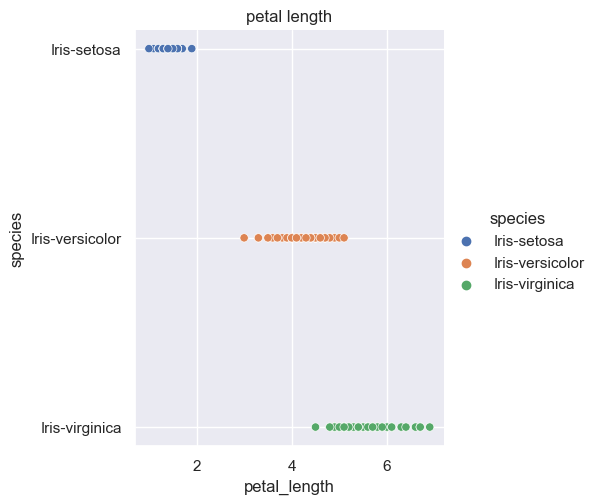

In [20]:
sns.relplot(x='petal_length', y='species', hue='species', data=data)
plt.title('petal length')
plt.show()

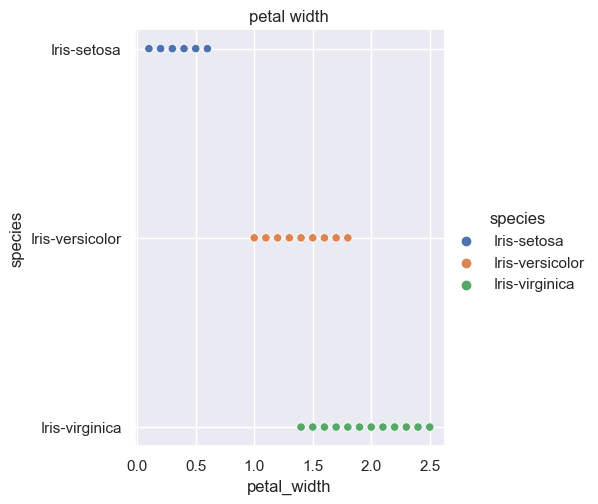

In [21]:
sns.relplot(x='petal_width', y='species', hue='species', data=data)
plt.title('petal width')
plt.show()

## Exploratory Data Analysis(EDA) -Pairplots

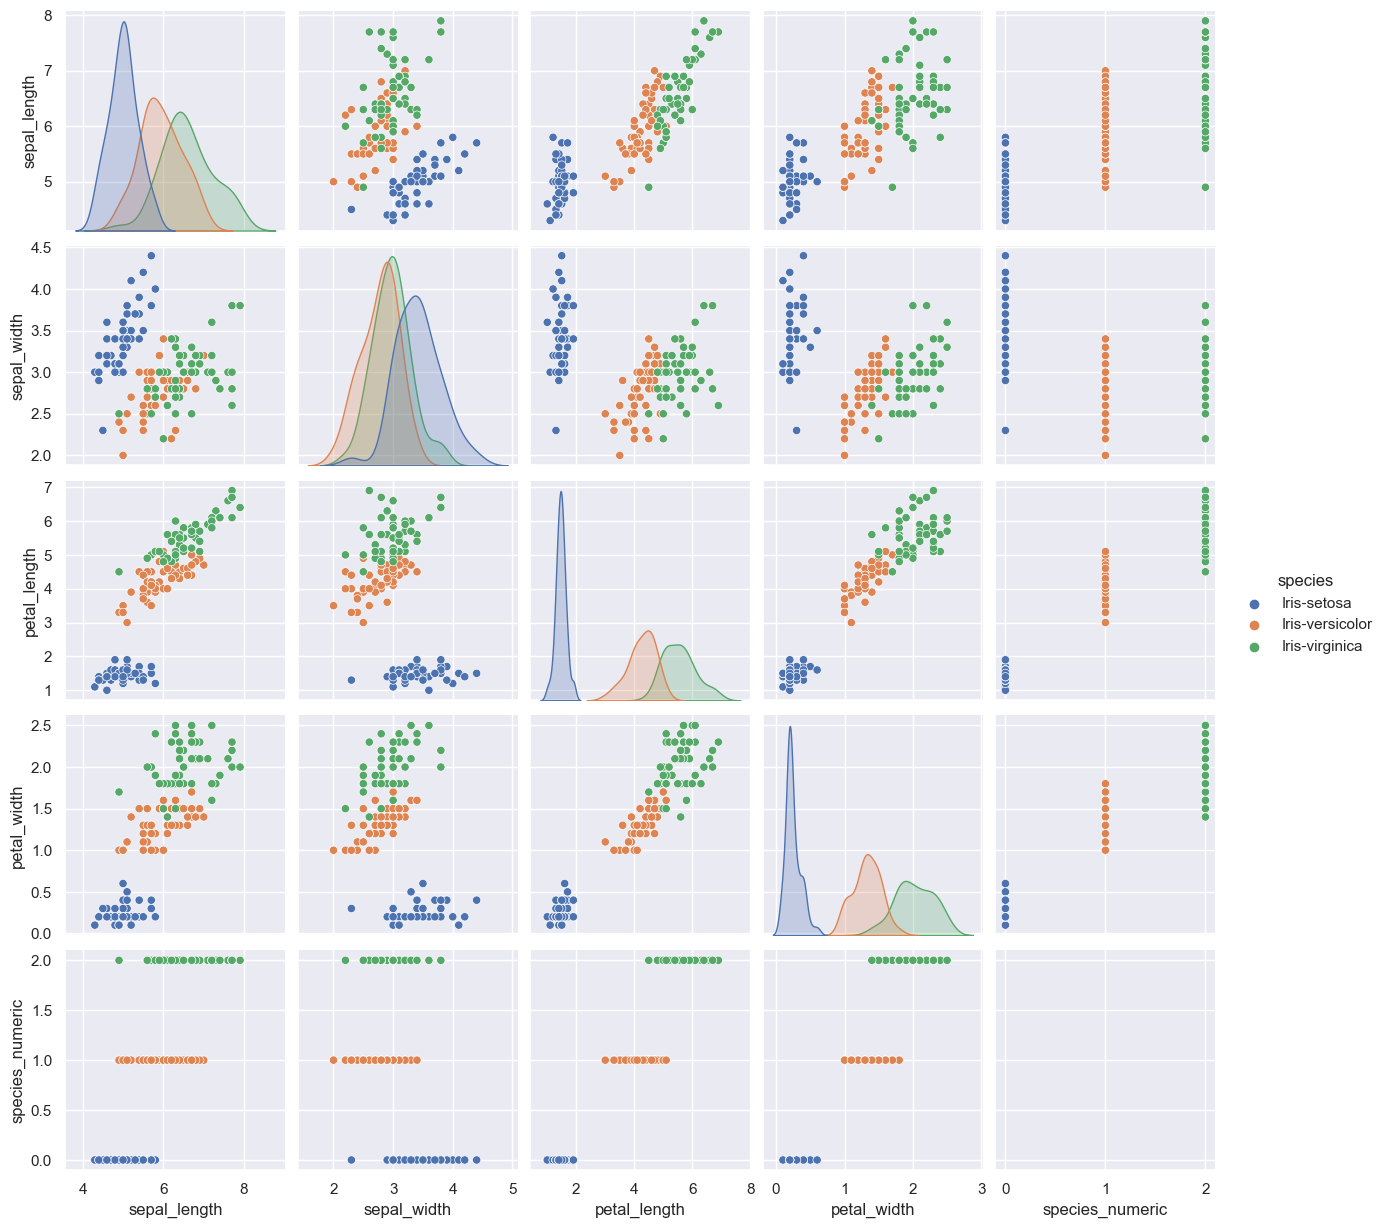

In [22]:
sns.pairplot(data, hue="species")
plt.show()

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
data_train, data_test = train_test_split(data, test_size=0.25)

In [25]:
data_test.shape

(38, 6)

In [26]:
data_train.shape

(112, 6)

In [27]:
data_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_numeric
123,6.3,2.7,4.9,1.8,Iris-virginica,2
97,6.2,2.9,4.3,1.3,Iris-versicolor,1
82,5.8,2.7,3.9,1.2,Iris-versicolor,1
46,5.1,3.8,1.6,0.2,Iris-setosa,0
52,6.9,3.1,4.9,1.5,Iris-versicolor,1


## prepare our data for modeling 
This involves the data back out into plain NumPy arrays

In [28]:
x_train = data_train.drop(columns=["species", "species_numeric"]).values
y_train = data_train["species_numeric"].values

In [29]:
y_train

array([2, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0,
       0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0,
       2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 0], dtype=int64)

## Modeling- Logistic regression


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
model.score(x_train, y_train)

0.9910714285714286

## Using Cross-Validation to Evaluate our Model

In [34]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [35]:
model = LogisticRegression(max_iter=200)

In [36]:
accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

In [37]:
np.mean(accuracies)

0.9549407114624507

## Model Tuning

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier()

In [40]:
accuracy = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")

In [41]:
np.mean(accuracy)

0.9545454545454547

## Final Model

In [42]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression(max_iter=200, C=2)  # Note the correct capitalization of 'LogisticRegression' and 'C'


In [43]:
x_test = data_test.drop(columns=["species", "species_numeric"]).values
y_test = data_test["species_numeric"].values

In [44]:
x_test.shape

(38, 4)

In [45]:
y_test

array([2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1], dtype=int64)

### Train our final model using our full training dataset

In [46]:
model.fit(x_train, y_train)

LogisticRegression(C=2, max_iter=200)

In [47]:
y_test_pred = model.predict(x_test)

In [48]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [49]:
print(f"Test set accuracy: {test_set_accuracy * 100:.2f}%")

Test set accuracy: 97.37%


In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Assuming you have your model's predictions in y_test_pred and the true labels in y_test
# Replace these with your actual data.

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Calculate F1 score (macro average)
f1 = f1_score(y_test, y_test_pred, average='macro')

# Calculate precision (macro average)
precision = precision_score(y_test, y_test_pred, average='macro')

# Print the results
print(f"Test set accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score (Macro): {f1:.2f}")
print(f"Precision (Macro): {precision:.2f}")

Test set accuracy: 97.37%
F1 Score (Macro): 0.98
Precision (Macro): 0.98
